# ML | Day 5

## DAY 5: EXPLORING THE WINE DATASET
 
### •Load the wine data from sklearn into a pandas DataFrame of features and target with their appropriate headers.

### •Normalize the features with the MinMax method.

### •Generate a dataframe showing the correlation of all the labels with themselves and the target variable using the:

#### a. Pearson’s correlation.
#### b. Kendall rank correlation.

### •Generate a heatmap for one of them.

### •Pick the feature with the highest correlation

### •Implement your own Logistic regressor and use it to and fit a line through a plot of it (the most correlated feature) against the target

In [1]:
import pandas as pd    #import libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns

In [2]:
from sklearn import datasets

In [4]:
wine_data = sklearn.datasets.load_wine()

In [6]:
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [32]:
wine = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)

In [25]:
wine['target']=wine_data.target

In [33]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Minmax Normalisation 

In [10]:
from sklearn import preprocessing

In [11]:
 min_max_scaler = preprocessing.MinMaxScaler()

In [34]:
n= min_max_scaler.fit_transform(wine)

In [37]:
n_wine = pd.DataFrame(n,columns =['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids', 'nonflavanoid_phenols','proanthocyanins','color_intensity','hue od280/od315_of_diluted_wines','proline','target']

SyntaxError: unexpected EOF while parsing (<ipython-input-37-8865facc63c2>, line 1)

In [40]:
n_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [39]:
n_wine['target']=wine_data.target

### Pearson’s correlation.

In [41]:
n_wine.corr(method='pearson')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


### Kendall rank correlation

In [42]:
n_wine.corr(method='kendall')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.093844,0.170154,-0.212978,0.250506,0.209099,0.191087,-0.109554,0.133526,0.434353,-0.021717,0.061513,0.449387,-0.238984
malic_acid,0.093844,1.000000,0.158178,0.210119,0.050869,-0.174929,-0.211918,0.175129,-0.168714,0.195607,-0.388707,-0.162909,-0.044660,0.247494
ash,0.170154,0.158178,1.000000,0.258352,0.254246,0.089855,0.049474,0.098937,0.018240,0.187786,-0.037234,-0.006341,0.171574,-0.038085
alcalinity_of_ash,-0.212978,0.210119,0.258352,1.000000,-0.121005,-0.256669,-0.309865,0.278091,-0.171404,-0.057281,-0.239210,-0.226253,-0.313218,0.449402
magnesium,0.250506,0.050869,0.254246,-0.121005,1.000000,0.172195,0.161603,-0.158361,0.117871,0.241781,0.023760,0.034307,0.343016,-0.184992
total_phenols,0.209099,-0.174929,0.089855,-0.256669,0.172195,1.000000,0.701999,-0.310443,0.466517,0.028264,0.289210,0.478267,0.280203,-0.590404
flavanoids,0.191087,-0.211918,0.049474,-0.309865,0.161603,0.701999,1.000000,-0.378099,0.534615,0.028674,0.354372,0.520448,0.263661,-0.725255
nonflavanoid_phenols,-0.109554,0.175129,0.098937,0.278091,-0.158361,-0.310443,-0.378099,1.000000,-0.269189,0.036065,-0.179755,-0.363787,-0.174108,0.379234
proanthocyanins,0.133526,-0.168714,0.018240,-0.171404,0.117871,0.466517,0.534615,-0.269189,1.000000,-0.014962,0.231071,0.369104,0.204172,-0.450225
color_intensity,0.434353,0.195607,0.187786,-0.057281,0.241781,0.028264,0.028674,0.036065,-0.014962,1.000000,-0.291561,-0.206046,0.316632,0.065124


### Heatmap for Pearson correlation 

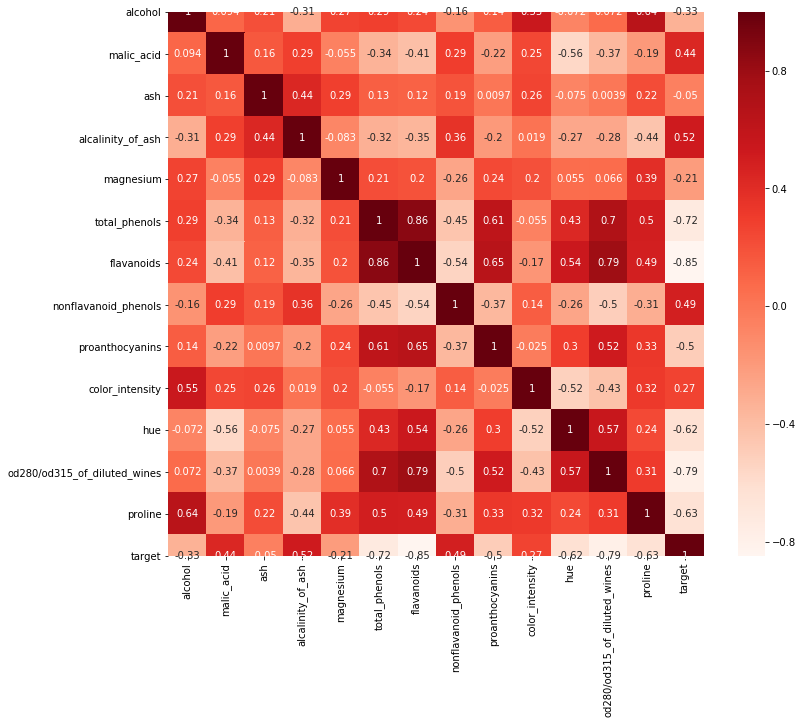

In [43]:
plt.figure(figsize=(12,10))
pearson_corr = n_wine.corr()
sns.heatmap(pearson_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
nwc = n_wine.corr().loc['target',:]
print(nwc )

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
target                          1.000000
Name: target, dtype: float64


In [47]:
abs_nwc = abs(nwc)
print(abs_nwc)

alcohol                         0.328222
malic_acid                      0.437776
ash                             0.049643
alcalinity_of_ash               0.517859
magnesium                       0.209179
total_phenols                   0.719163
flavanoids                      0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
color_intensity                 0.265668
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64


TypeError: corr() missing 1 required positional argument: 'other'

In [52]:
cor_target = abs(nwc["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

array([1.])

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [68]:
X = np. array(wine['flavanoids'])


In [72]:
Y = np.array(n_wine['target'])

In [69]:
X.flatten()

array([3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2.98, 3.15, 3.32,
       2.43, 2.76, 3.69, 3.64, 2.91, 3.14, 3.4 , 3.93, 3.03, 3.17, 2.41,
       2.88, 2.37, 2.61, 2.68, 2.94, 2.19, 2.97, 2.33, 3.25, 3.19, 2.69,
       2.74, 2.53, 2.98, 2.68, 2.43, 2.64, 3.04, 3.29, 2.68, 3.56, 2.63,
       3.  , 2.65, 3.17, 3.39, 2.92, 3.54, 3.27, 2.99, 3.74, 2.79, 2.9 ,
       2.78, 3.  , 3.23, 3.67, 0.57, 1.09, 1.41, 1.79, 3.1 , 1.75, 2.65,
       3.18, 2.  , 1.3 , 1.28, 1.02, 2.86, 1.84, 2.89, 2.14, 1.57, 2.03,
       1.32, 1.85, 2.55, 2.26, 2.53, 1.58, 1.59, 2.21, 1.94, 1.69, 1.61,
       1.69, 1.59, 1.5 , 1.25, 1.46, 2.25, 2.26, 2.27, 0.99, 2.5 , 3.75,
       2.99, 2.17, 1.36, 2.11, 1.64, 1.92, 1.84, 2.03, 1.76, 2.04, 2.92,
       2.58, 2.27, 2.03, 2.01, 2.29, 2.17, 1.6 , 2.09, 1.25, 1.64, 2.79,
       5.08, 2.13, 2.65, 3.03, 2.65, 3.15, 2.24, 2.45, 1.75, 1.25, 1.22,
       1.09, 1.2 , 0.58, 0.66, 0.47, 0.6 , 0.48, 0.6 , 0.5 , 0.5 , 0.52,
       0.8 , 0.78, 0.55, 0.34, 0.65, 0.76, 1.39, 1.

In [73]:
Y.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [57]:
linear_regressor = LinearRegression()  # create object for the class

In [74]:
linear_regressor.fit(X, Y) 


ValueError: Expected 2D array, got 1D array instead:
array=[3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 3.32 2.43 2.76 3.69
 3.64 2.91 3.14 3.4  3.93 3.03 3.17 2.41 2.88 2.37 2.61 2.68 2.94 2.19
 2.97 2.33 3.25 3.19 2.69 2.74 2.53 2.98 2.68 2.43 2.64 3.04 3.29 2.68
 3.56 2.63 3.   2.65 3.17 3.39 2.92 3.54 3.27 2.99 3.74 2.79 2.9  2.78
 3.   3.23 3.67 0.57 1.09 1.41 1.79 3.1  1.75 2.65 3.18 2.   1.3  1.28
 1.02 2.86 1.84 2.89 2.14 1.57 2.03 1.32 1.85 2.55 2.26 2.53 1.58 1.59
 2.21 1.94 1.69 1.61 1.69 1.59 1.5  1.25 1.46 2.25 2.26 2.27 0.99 2.5
 3.75 2.99 2.17 1.36 2.11 1.64 1.92 1.84 2.03 1.76 2.04 2.92 2.58 2.27
 2.03 2.01 2.29 2.17 1.6  2.09 1.25 1.64 2.79 5.08 2.13 2.65 3.03 2.65
 3.15 2.24 2.45 1.75 1.25 1.22 1.09 1.2  0.58 0.66 0.47 0.6  0.48 0.6
 0.5  0.5  0.52 0.8  0.78 0.55 0.34 0.65 0.76 1.39 1.57 1.36 1.28 0.83
 0.58 0.63 0.83 0.58 1.31 1.1  0.92 0.56 0.6  0.7  0.68 0.47 0.92 0.66
 0.84 0.96 0.49 0.51 0.7  0.61 0.75 0.69 0.68 0.76].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
Y_pred = linear_regressor.predict(X) 